In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NW_20.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,NaN,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,NaN,0.28,0.50,NaN,0.14,NaN,0.21,0.07,0.00,NaN,...,0.0,0.0,0.132,0.0,0.372,NaN,0.048,5.114,NaN,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,NaN,0.31,NaN,...,NaN,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,NaN,0.00,NaN,0.0,1.85,0.00,0.00,NaN,NaN,0.00,...,0.0,0.0,0.223,NaN,0.000,0.000,0.000,3.000,NaN,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,NaN,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,NaN,0.054,0.000,NaN,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,NaN,0.00,0.00,0.00,NaN,...,0.0,0.0,NaN,0.0,NaN,NaN,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.00,...,0.0,0.0,0.000,0.0,0.000,NaN,0.000,NaN,15.0,70.0
4594,0.00,NaN,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,NaN,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,NaN,...,0.0,0.0,0.032,NaN,NaN,0.000,0.000,NaN,NaN,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	870
float64		column 2	1052
float64		column 3	994
float64		column 4	696
float64		column 5	638
float64		column 6	1044
float64		column 7	870
float64		column 8	754
float64		column 9	762
float64		column 10	986
float64		column 11	936
float64		column 12	986
float64		column 13	646
float64		column 14	928
float64		column 15	994
float64		column 16	812
float64		column 17	1160
float64		column 18	646
float64		column 19	762
float64		column 20	812
float64		column 21	928
float64		column 22	870
float64		column 23	994
float64		column 24	646
float64		column 25	936
float64		column 26	936
float64		column 27	878
float64		column 28	1160
float64		column 29	936
float64		column 30	928
float64		column 31	1160
float64		column 32	986
float64		column 33	812
float64		column 34	696
float64		column 35	1342
float64		column 36	704
float64		column 37	820
float64		column 38	646
float64		column 39	936
float64		column 40	812
float64		column 41	1102
float64		column 42	82

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,3727.000000,3545.000000,3603.000000,3901.000000,3959.000000,3553.000000,3727.000000,3843.000000,3835.000000,3611.000000,...,3727.000000,3727.000000,3843.000000,3719.000000,3669.000000,3371.000000,3603.000000,3321.000000,3197.000000,4017.000000
mean,0.089734,0.189859,0.258296,0.043215,0.288613,0.081464,0.094631,0.096724,0.081220,0.217998,...,0.026727,0.037870,0.132919,0.016998,0.253724,0.061470,0.040573,5.021585,43.795433,270.396565
std,0.273400,1.196129,0.462898,1.154679,0.629914,0.247190,0.330045,0.394832,0.271752,0.640156,...,0.240808,0.252407,0.268526,0.118502,0.822337,0.179001,0.457795,34.680728,103.586484,596.780952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.619000,7.000000,36.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.069000,0.000000,0.010000,0.000000,0.000000,2.325000,16.000000,97.000000
75%,0.000000,0.000000,0.370000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.130000,...,0.000000,0.000000,0.178000,0.000000,0.296000,0.044000,0.000000,3.718000,45.000000,261.000000
max,4.540000,14.280000,4.000000,42.810000,10.000000,3.570000,5.400000,11.110000,5.260000,18.180000,...,8.330000,4.385000,9.752000,4.081000,32.478000,3.260000,19.829000,1102.500000,2042.000000,15841.000000


<AxesSubplot:>

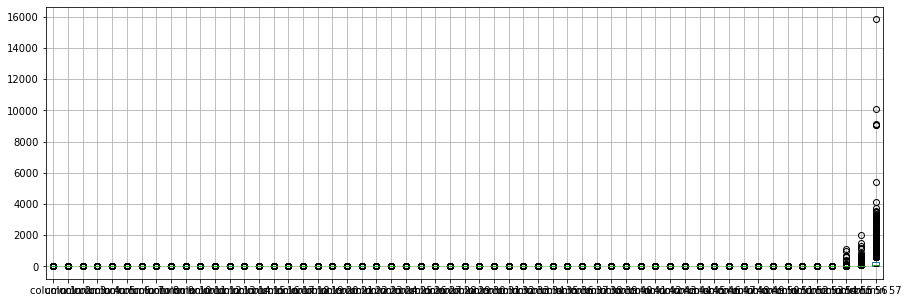

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.089734
column 2       0.189859
column 3       0.258296
column 4       0.043215
column 5       0.288613
column 6       0.081464
column 7       0.094631
column 8       0.096724
column 9       0.081220
column 10      0.217998
column 11      0.052417
column 12      0.525184
column 13      0.088557
column 14      0.048929
column 15      0.042639
column 16      0.224967
column 17      0.123634
column 18      0.166986
column 19      1.623455
column 20      0.081305
column 21      0.774271
column 22      0.107553
column 23      0.082526
column 24      0.084692
column 25      0.495023
column 26      0.239869
column 27      0.694853
column 28      0.101682
column 29      0.070522
column 30      0.078697
column 31      0.054254
column 32      0.046469
column 33      0.090972
column 34      0.041938
column 35      0.079143
column 36      0.084228
column 37      0.121777
column 38      0.015080
column 39      0.061262
column 40      0.060610
column 41      0.039396
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.024369,0.069773,0.014721,0.029176,0.051061,-0.002282,-0.002792,0.093053,0.019882,...,-0.011028,-0.021496,-0.015572,-0.024312,0.076759,0.103814,-0.010972,0.044551,0.110318,0.102750
column 2,-0.024369,1.000000,-0.025604,-0.005297,-0.017435,-0.025953,0.001451,-0.010108,0.004851,0.033216,...,-0.015282,-0.007313,-0.035506,-0.017668,-0.010211,-0.008541,0.003837,-0.003605,0.014377,-0.018413
column 3,0.069773,-0.025604,1.000000,-0.017223,0.062329,0.108435,0.045378,0.009432,0.101538,0.026073,...,-0.031501,-0.029764,-0.035896,-0.021757,0.086841,0.107344,0.016404,0.083667,0.162594,0.078486
column 4,0.014721,-0.005297,-0.017223,1.000000,0.012613,-0.012202,0.022884,0.010694,-0.010789,-0.004569,...,0.001332,-0.003456,-0.005088,-0.005175,-0.001604,0.003588,-0.002250,0.004231,0.027552,0.014152
column 5,0.029176,-0.017435,0.062329,0.012613,1.000000,0.057835,0.156760,0.020226,0.026296,0.024691,...,-0.028862,-0.031740,-0.037398,-0.019514,0.022183,0.054697,0.006842,0.048967,0.082812,0.007312
column 6,0.051061,-0.025953,0.108435,-0.012202,0.057835,1.000000,0.060770,0.057488,0.112050,0.005964,...,-0.029040,-0.010233,-0.004794,-0.023557,0.042791,0.095383,0.010952,-0.009946,0.151578,0.089140
column 7,-0.002282,0.001451,0.045378,0.022884,0.156760,0.060770,1.000000,0.048013,0.057381,0.046446,...,-0.031929,-0.029910,-0.049931,-0.018430,0.064831,0.077022,0.065763,0.020615,0.109251,0.002777
column 8,-0.002792,-0.010108,0.009432,0.010694,0.020226,0.057488,0.048013,1.000000,0.100677,0.066717,...,-0.014852,-0.026632,-0.031755,-0.017091,0.026686,0.061405,-0.006841,0.008963,0.052416,0.040810
column 9,0.093053,0.004851,0.101538,-0.010789,0.026296,0.112050,0.057381,0.100677,1.000000,0.095234,...,-0.023709,-0.011791,-0.023101,0.019258,0.035821,0.185362,-0.002569,0.109450,0.264163,0.218541
column 10,0.019882,0.033216,0.026073,-0.004569,0.024691,0.005964,0.046446,0.066717,0.095234,1.000000,...,-0.029179,0.000966,-0.001278,0.002130,0.044730,0.067305,0.036914,0.037237,0.125112,0.066844


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+16,17+16+16,17+16+16+16,17+16+16,17+16,17], vae_layer = False, seed = 160)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 512.5797862674301
Epoch: 1 , loss: 516.446002069666
Epoch: 2 , loss: 515.2195551004975
Epoch: 3 , loss: 515.5816965668043
Epoch: 4 , loss: 518.748996455495
Epoch: 5 , loss: 516.1330229862226
Epoch: 6 , loss: 512.403843869731
Epoch: 7 , loss: 516.2463967725375
Epoch: 8 , loss: 513.5499990111028
Epoch: 9 , loss: 513.278302980217
Epoch: 10 , loss: 515.1793205447314
Epoch: 11 , loss: 512.1868024553571
Epoch: 12 , loss: 491.52831284260503
Epoch: 13 , loss: 446.2484144151003
Epoch: 14 , loss: 422.5171950336948
Epoch: 15 , loss: 404.7616086155695
Epoch: 16 , loss: 410.5525584735937
Epoch: 17 , loss: 406.02063505325583
Epoch: 18 , loss: 391.6618547339888
Epoch: 19 , loss: 397.4496452650542
Epoch: 20 , loss: 394.74177548611203
Epoch: 21 , loss: 390.24545484802036
Epoch: 22 , loss: 382.58354633610423
Epoch: 23 , loss: 387.17323382972427
Epoch: 24 , loss: 384.45572675645144
Epoch: 25 , loss: 386.824079613237
Epoc

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000000
column 2      0.000000
column 3      0.000000
column 4     -0.022581
column 5      0.240610
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.383986
column 13     0.116083
column 14     0.000000
column 15     0.000000
column 16     0.000000
column 17     0.000000
column 18     0.000000
column 19     0.000000
column 20     0.096695
column 21     0.650444
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.057244
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     0.000000
column 33     0.000000
column 34     0.000000
column 35    -0.003780
column 36     0.000000
column 37     0.000000
column 38     0.000000
column 39     0.000000
column 40     0.000000
column 41     0.000000
column 42     0.000000
column 43     0.017631
column 44  

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.121860,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,-0.162644,0.000000,0.000000,-0.005978,0.0,-0.227524,0.000000,0.000000,0.000000,-0.762048,...,0.000000,0.0,0.000000,0.000000,0.000000,-0.126046,0.000000,0.000000,-91.177809,0.0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-0.519044,0.000000,-0.350773,...,-0.015111,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,-0.008777,0.000000,0.357124,0.000000,0.0,0.000000,0.000000,-1.775511,0.215155,0.000000,...,0.000000,0.0,0.000000,-0.047876,0.000000,0.000000,0.000000,0.000000,1.837479,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.106503,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,-0.039556,0.000000,0.000000,0.779415,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.000000,0.000000,0.000000,0.0,0.107748,0.000000,0.000000,0.000000,0.288508,...,0.000000,0.0,-0.165432,0.000000,-0.987393,0.152555,0.000000,0.000000,0.000000,0.0
4593,0.000000,0.000000,0.000000,0.016734,0.0,0.081201,0.000000,0.000000,0.034094,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.098004,0.000000,-0.727821,0.000000,0.0
4594,0.000000,0.119976,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.355802,0.000000,0.000000,0.0
4595,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.269724,...,0.000000,0.0,0.000000,-0.015976,0.075755,0.000000,0.000000,1.196210,15.158869,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

20673.444062623843

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.4356095770576965

In [19]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.440000
column 3       0.890000
column 4      -0.019435
column 5       0.440000
column 6       0.094697
column 7       0.000000
column 8       0.000000
column 9       0.000000
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.000000
column 15      0.000000
column 16      0.440000
column 17     -0.102095
column 18      0.890000
column 19      2.240000
column 20      0.000000
column 21      1.340000
column 22     -0.080054
column 23      0.000000
column 24      0.000000
column 25      0.000000
column 26      0.000000
column 27      0.000000
column 28      0.000000
column 29     -0.004932
column 30      0.000000
column 31      0.000000
column 32      0.000000
column 33      0.000000
column 34      0.000000
column 35      0.000000
column 36      0.000000
column 37      0.000000
column 38     -0.024561
column 39      0.000000
column 40      0.000000
column 41     -0.018755
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.640000,0.640000,0.000000,0.32,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.121860,0.0,0.000000,0.000000,0.778000,0.000000,0.000000,3.756000,61.000000,278.0
1,0.047356,0.280000,0.500000,-0.005978,0.14,0.052476,0.210000,0.070000,0.000000,0.177952,...,0.000000,0.0,0.132000,0.000000,0.372000,0.053954,0.048000,5.114000,9.822191,1028.0
2,0.000000,0.000000,0.000000,0.000000,0.63,0.000000,0.310000,0.110956,0.310000,0.279227,...,-0.015111,0.0,0.135000,0.000000,0.135000,0.000000,0.000000,3.537000,40.000000,191.0
3,-0.008777,0.000000,0.357124,0.000000,1.85,0.000000,0.000000,0.074489,0.215155,0.000000,...,0.000000,0.0,0.223000,-0.047876,0.000000,0.000000,0.000000,3.000000,16.837479,54.0
4,0.000000,0.000000,0.000000,0.000000,1.92,0.000000,0.106503,0.000000,0.000000,0.640000,...,0.000000,0.0,0.054000,0.000000,0.124444,0.054000,0.000000,2.450415,4.000000,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.000000,0.640000,0.000000,0.00,0.107748,0.000000,0.000000,0.000000,0.288508,...,0.000000,0.0,0.182568,0.000000,0.172607,0.152555,0.000000,3.121000,15.000000,103.0
4593,0.000000,0.000000,0.000000,0.016734,0.00,0.081201,0.000000,0.000000,0.034094,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.098004,0.000000,2.315179,15.000000,70.0
4594,0.000000,0.119976,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.136000,0.000000,0.000000,0.000000,0.053198,1.837000,12.000000,68.0
4595,0.170000,0.000000,0.680000,0.000000,0.34,0.340000,0.000000,0.000000,0.000000,0.269724,...,0.000000,0.0,0.032000,-0.015976,0.140755,0.000000,0.000000,2.385210,20.158869,69.0


In [21]:
imputations[-1].to_excel("Spam_NW_20(imp).xlsx", index=False, header=False)